In [22]:
import pandas as pd
import numpy as np
import pysindy as ps
import math
import scipy.io
from numpy import diff

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from sklearn.linear_model import Lasso

## Case 1: Single column 

###  Create the training dataset

In [23]:
#use the trial 1 to 7 the training data
arrayNum = 1
trial = 2
t_train = [] 
x_train = []
xdot_train = []
print('start')
#for every arrayNum
for i in range (1,arrayNum+1):
    print('data read', str(i))    
    for j in range (trial):
        mat = scipy.io.loadmat(r'C:\Users\l2016\GitHub\nonlinear-brain-mass-model\data-gen\single-column-dataMat\data_'+str(i)+'.mat')
        #mat = scipy.io.loadmat(r'/lab_data/barblab/AlexP/will/dataGen/single-column-data/data_' + str(i) + '.mat')
        #mat = scipy.io.loadmat(r'/lab_data/barblab/AlexP/will/dataGen/data-fs10/data_' + str(i) + '.mat')
        #get the data
        tp_t = mat.get("data_t")
        tp_x = mat.get("data_x")
        tp_xdot = mat.get("data_xdot")
        t_train.append(tp_t[:,:,j])
        x_train.append(tp_x[:,:,j])
        xdot_train.append(tp_xdot[:,:,j])

print('training data shape', x_train[0].shape)
print('training data type', type(x_train[0]))
print('total number of trials', len(t_train))
print('dimension for 1 trial', t_train[1].shape)

start
data read 1
training data shape (2951, 8)
training data type <class 'numpy.ndarray'>
total number of trials 2
dimension for 1 trial (2951, 1)


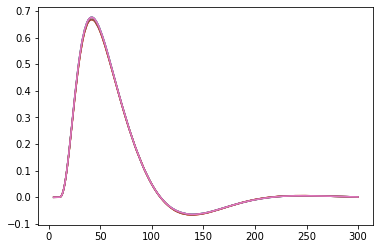

In [24]:
i = 0
for trl in train_x:
    cl1 = trl[:,1] - trl[:,2]
    plt.plot(train_t[i], cl1)
    i += 1

### Fit the Sindy with the training dataset

In [26]:
#I will initial with only 2 functions: one is x 
# the other is the sigmoid-liked function
library_functions = [
    lambda x3, x2: -2.5+5/(1+np.exp(-0.56*(x3-x2))), #-e0+2*e0/(1+exp(-r*x))
    lambda x : x,
    lambda x : -2.5+5/(1+np.exp(-0.56*x)) #-e0+2*e0/(1+exp(-r*x))
]
                           
library_function_names = [
    lambda x3, x2 : 'S(' + x3 + '-' + x2 + ')',
    lambda x : x,
    lambda x : 'S(' + x + ')'
]

custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

In [27]:
#pass the x and its derivative
#Threshold:
#minimum coefficient 0.0026 hi*gamma4/ti
optimizer = ps.STLSQ(threshold=0.001)
feature_library=custom_library
dt = 0.01
model = ps.SINDy(
    feature_library=feature_library,
    optimizer = optimizer
)
self = model.fit(x_train, t=t_train, x_dot=xdot_train,multiple_trajectories=True)
model.print()

(x0)' = 1.000 x3
(x1)' = 1.000 x4
(x2)' = 1.000 x5
(x3)' = 20.529 S(x0-x1) + -27.107 S(x0-x2) + 115.715 S(x0-x3) + 1108.276 S(x0-x4) + -3371.229 S(x0-x5) + 886.600 S(x0-x6) + -1737.870 S(x0-x7) + 3.677 S(x1-x2) + -2114.572 S(x1-x3) + -2550.702 S(x1-x4) + 7245.000 S(x1-x5) + -499.038 S(x1-x6) + 1145.849 S(x1-x7) + -443.536 S(x2-x3) + -370.713 S(x2-x4) + 2453.778 S(x2-x5) + -570.358 S(x2-x6) + 486.795 S(x2-x7) + 14695.115 S(x3-x4) + 1426683.259 S(x3-x5) + -69655.073 S(x3-x6) + -1867323.218 S(x3-x7) + -6754886.342 S(x4-x5) + 64935.288 S(x4-x6) + 1041803.196 S(x4-x7) + 64593.811 S(x5-x6) + 83221.412 S(x5-x7) + -63812.486 S(x6-x7) + -33.364 x0 + -92.347 x1 + 170.245 x2 + -1023.572 x3 + -1133691.649 x4 + 318433.076 x5 + -3484.762 x6 + 96741486.437 x7 + 3049.594 S(x0) + -3077.054 S(x1) + -1822.442 S(x2) + 494624.835 S(x3) + 7280677.887 S(x4) + -5924679.530 S(x5) + 128500.358 S(x6) + -139008324.623 S(x7)
(x4)' = 1.758 S(x0-x1) + -26.330 S(x0-x2) + -0.444 S(x0-x3) + -5.872 S(x0-x4) + 188.513 S(

### Score for the time derivative prediction produced by the model

In [35]:
#multiple trajctories for this
#training data
t_test = []
x_test = []
xdot_test = []

#for every arrayNum
for i in range (2,3):
    for j in range (trial):
        mat = scipy.io.loadmat(r'C:\Users\l2016\GitHub\nonlinear-brain-mass-model\data-gen\single-column-dataMat\data_'+str(i)+'.mat')
        #get the data
        tp_t = mat.get("data_t")
        tp_x = mat.get("data_x")
        tp_xdot = mat.get("data_xdot")
        t_test.append(tp_t[:,:,j])
        x_test.append(tp_x[:,:,j])
        xdot_test.append(tp_xdot[:,:,j])
    
#x_test can have 200 trails
print('Model score: %f' % model.score(x_test, t = t_test, x_dot = xdot_test, multiple_trajectories=True))

Model score: 0.933496


### Plots for test data time derivative  comperation

[0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\l2016\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


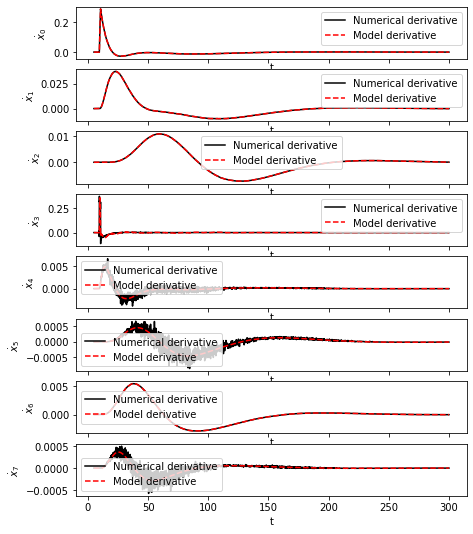

In [36]:
print(x_test[0][0,:])
#x test doing split
xdot_predicted = model.predict(x_test, multiple_trajectories=True)

fig, axs = plt.subplots(x_test[0].shape[1], 1, sharex=True, figsize=(7, 9))

for i in range(x_test[0].shape[1]):
    for j in range(1):
        axs[i].plot(t_test[j], xdot_test[j][:, i],'k')
        axs[i].plot(t_test[j], xdot_predicted[j][:, i],'r--')
        
    axs[i].legend(['Numerical derivative', 'Model derivative'])
    axs[i].set(xlabel='t', ylabel='$\dot x_{}$'.format(i))
fig.show()

### Generate model prediction X

In [79]:
# time interval of the simulation
dt = 0.1
t_sim = np.arange(10, 200, dt)

# use the x_train at 5 ms value as initial condition
    #the 1st index is 5s
x0_sim = x_test[0][500,:]
print(x0_sim)

x_test_sim = model.simulate(x0_sim, t_sim, integrator = "odeint")
print('dimension of the x_test_simulation:', x_test_sim.shape)

[3.79248307e-02 6.81319575e-06 1.53882476e-15 1.51606731e-01
 5.48590111e-05 1.20640366e-13 1.32954619e-10 1.74421030e-09]
dimension of the x_test_simulation: (1900, 8)


C:\Users\l2016\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


### Plots for model prediction performance

In [80]:
#simulation result
cl1_sim = x_test_sim[:,1] - x_test_sim[:,2]
print(len(cl1_sim))
print(len(t_sim))
#real value
cl1 = x_test[0][:,1] - x_test[0][:,2]


1900
1900


(-0.5, 1)

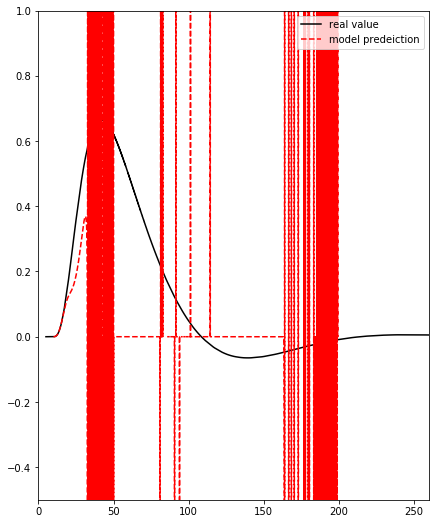

In [82]:
fig, ax = plt.subplots(figsize=(7, 9))
ax.plot(t[0], cl1,'k')
ax.plot( t_sim, cl1_sim, 'r--')
ax.legend(['real value','model predeiction'])
ax.set_xlim([0, 260])
ax.set_ylim([-0.5, 1])

### Numerical performance of the model on the test data

In [ ]:
#calculate the performance by 1 - the SE/sum of all data points 

In [28]:
import numpy as np

a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

c = np.concatenate((a, b), axis=0)
print(c.shape)
d = np.concatenate((a, b.T), axis=1)
print(d.shape)
e = np.concatenate((a, b), axis=None)
print(e.shape)

(3, 2)
(2, 3)
(6,)
